In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()

In [3]:
X,y = housing.data, housing.target
y = np.log1p(y)

In [4]:
#1 Splitting the data 
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [5]:
#2 Preprocessing for Gradient Descent to minimize the loss : Variance in the dataset.
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train, y_train)
X_test_scaled = scalar.transform(x_test)

In [6]:
# training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# Predicting and evaluating the values
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [8]:
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 0.2218
R2 Score: 0.6129


In [9]:
# interpretiability
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

MedInc: 0.2434
HouseAge: 0.0259
AveRooms: -0.0742
AveBedrms: 0.0917
Population: 0.0037
AveOccup: -0.0120
Latitude: -0.3445
Longitude: -0.3283


In [10]:
def plotting(y_test, y_pred):
    """
    Generates a 1x3 diagnostic dashboard for a regression model:
    1. Residuals vs Predicted
    2. Residual distribution (histogram + KDE)
    3. Q-Q plot of residuals
    """

    # Compute residuals
    residual = np.asarray(y_test) - np.asarray(y_pred)

    # Create figure structure
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # ---------------------------------------------------------
    # Plot 1: Residuals vs. Predicted
    # ---------------------------------------------------------
    sns.scatterplot(
        x=y_pred,
        y=residual,
        ax=axes[0],
        alpha=0.5
    )
    axes[0].axhline(0, color='red', linestyle='--', lw=2)
    axes[0].set_xlabel('Predicted Values (ŷ)')
    axes[0].set_ylabel('Residuals (y − ŷ)')
    axes[0].set_title('Residuals vs Predicted')

    # ---------------------------------------------------------
    # Plot 2: Histogram of Residuals
    # ---------------------------------------------------------
    sns.histplot(
        residual,
        ax=axes[1],
        kde=True,
        bins=30
    )
    axes[1].set_title('Residual Distribution')
    axes[1].set_xlabel('Residual')

    # ---------------------------------------------------------
    # Plot 3: Q-Q Plot
    # ---------------------------------------------------------
    stats.probplot(residual, dist='norm', plot=axes[2])
    axes[2].set_title('Q–Q Plot')

    plt.tight_layout()
    plt.show()


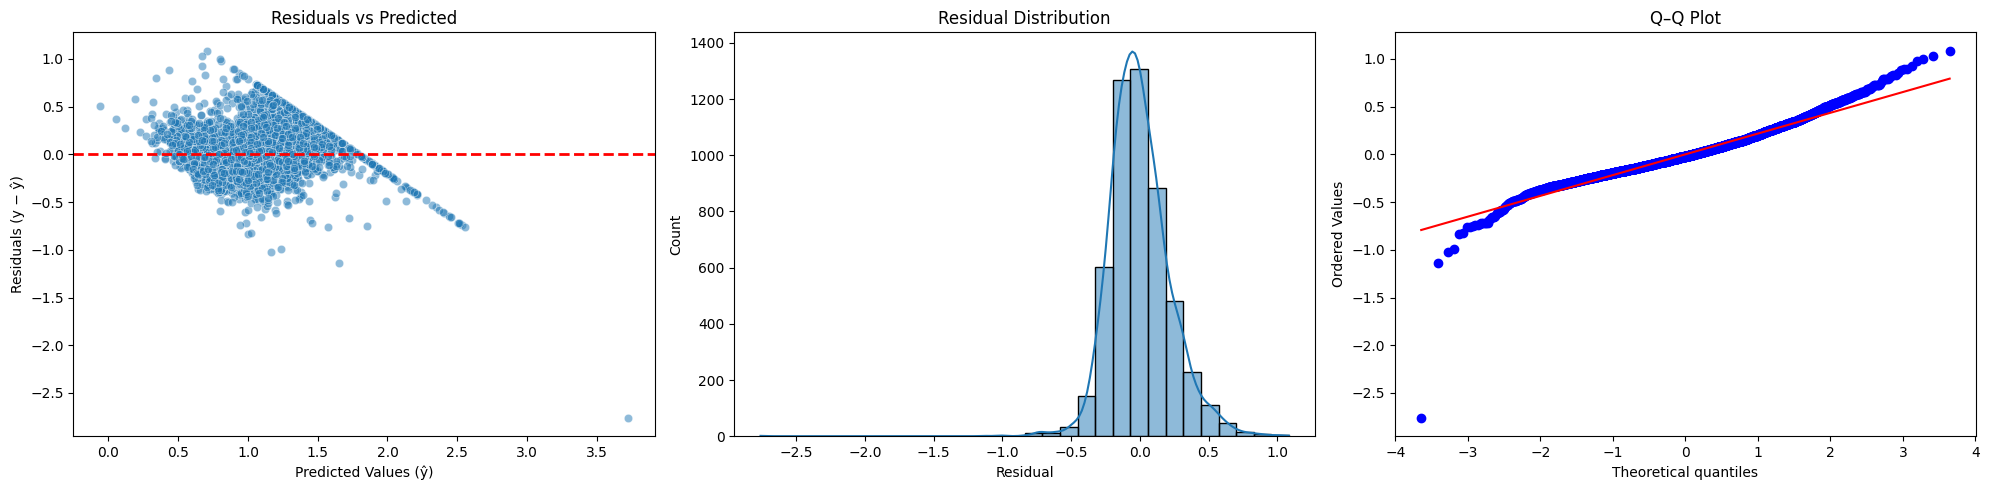

In [11]:
plotting(y_test, y_pred)